In [2]:
from evaluations import *
acc =1e-2
boundary = 'robin'
coarse_grid_resolution = 10
p = helmholtz(boundary = boundary)
infsups = []
conts = []
for k in range(1,100):
    print k
    resolution  = int(np.ceil(float(k*1.5+50)/coarse_grid_resolution)*coarse_grid_resolution)
    cglob = -1j*k
    cloc0 = 0
    cloc1 = 0.02*(5-1j)
    cloc2 = 0.0016*(8-1j)
    cloc = cloc0+ cloc1*k+cloc2*k**2
    mus = {'k': k, 'c_glob': cglob, 'c_loc': cloc}
    gq, lq = localize_problem(p, coarse_grid_resolution, resolution, mus = mus)
    infsups.append(calculate_inf_sup_constant2(gq,lq))
    conts.append(calculate_continuity_constant(gq,lq))

1
localizing problem
calculated_inf_sup_constant:  0.890186370566
calculated_continuity_constant:  4.30020182517
2
localizing problem
calculated_inf_sup_constant:  0.652513712775
calculated_continuity_constant:  2.59635436311
3
localizing problem
calculated_inf_sup_constant:  0.444885309922
calculated_continuity_constant:  2.14909574128
4
localizing problem
calculated_inf_sup_constant:  0.317046219858
calculated_continuity_constant:  1.95861636953
5
localizing problem
calculated_inf_sup_constant:  0.255392002573
calculated_continuity_constant:  1.85501791755
6
localizing problem
calculated_inf_sup_constant:  0.227325649277
calculated_continuity_constant:  1.79186818672
7
localizing problem
calculated_inf_sup_constant:  0.196063664283
calculated_continuity_constant:  1.7513955008
8
localizing problem
calculated_inf_sup_constant:  0.17439015845
calculated_continuity_constant:  1.72466141445
9
localizing problem
calculated_inf_sup_constant:  0.148024774472
calculated_continuity_constant: 

KeyboardInterrupt: 

In [24]:
from evaluations import *
acc =1e-2
boundary = 'robin'
coarse_grid_resolution = 10
p = helmholtz(boundary = boundary)
infsups = []
conts = []
for k in range(1,10):
    print k
    resolution  = int(np.ceil(float(k*1.5+50)/coarse_grid_resolution)*coarse_grid_resolution)
    cglob = -1j*k
    cloc0 = 0
    cloc1 = 0.02*(5-1j)
    cloc2 = 0.0016*(8-1j)
    cloc = cloc0+ cloc1*k+cloc2*k**2
    mus = {'k': k, 'c_glob': cglob, 'c_loc': cloc}
    d, data = discretize_elliptic_cg(p, diameter = 1./resolution)
    op = d.operator.assemble(mus)
    full_l2_product = d.products["l2"].assemble()
    full_h1_semi_product = d.products["h1_semi"].assemble()
    k_product = LincombOperator((full_h1_semi_product,full_l2_product),(1,mus["k"]**2)).assemble()
    prod = k_product
    
    A = op._matrix
    H1 = prod._matrix
    Y = H1
    X = H1

    try:
        a = data['boundary_info'].dirichlet_boundaries(2)
        b = np.arange(A.shape[0])
        c = np.delete(b,a)
        A = A[:,c][c,:]
        X = X[:,c][c,:]
        Y = Y[:,c][c,:]
    except KeyError:
        pass

    Yinv = sp.factorized(Y.astype(complex))
    def mv(v):
        return A.H.dot(Yinv(A.dot(v)))
    M1 = LinearOperator(A.shape, matvec = mv)
    
    eigvals = sp.eigs(M1, M=X, k=1, tol = 1e-4)[0]
    eigvals = np.sqrt(np.abs(eigvals))
    eigvals[::-1].sort()
    conts.append(eigvals[0])
    
    eigvals = sp.eigs(M1, M=X, which = 'SM', tol = 1e-1, k=100)[0]
    eigvals = np.sqrt(np.abs(eigvals))
    eigvals.sort()
    infsups.append(eigvals[0])

1
2
3
4
5
6
7
8
9


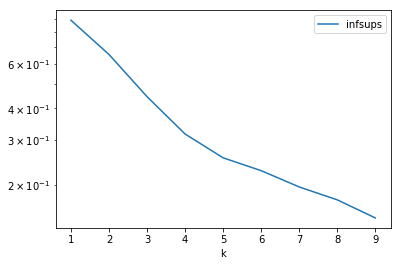

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure()
plt.semilogy(range(1,10), infsups, label = "infsups")
plt.legend(loc='upper right')
plt.xlabel('k')
plt.show()

In [7]:
len(conts)

36

In [8]:
conts1 = conts[:35]

In [9]:
len(conts1)

35

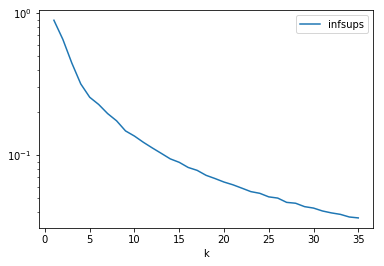

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure()
plt.semilogy(range(1,36), infsups, label = "infsups")
plt.legend(loc='upper right')
plt.xlabel('k')
plt.show()

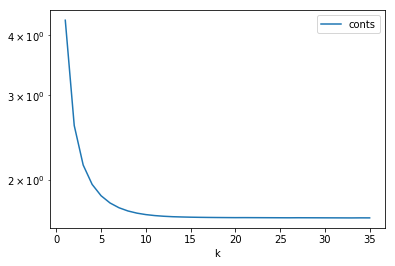

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure()
plt.semilogy(range(1,36), conts1, label = "conts")
plt.legend(loc='upper right')
plt.xlabel('k')
plt.show()

In [19]:
conts

[4.3002018251738967,
 2.5963543631079817,
 2.1490957412816587,
 1.9586163695260883,
 1.8550179175503005,
 1.7918681867230677,
 1.751395500801145,
 1.7246614144498102,
 1.7068435597865659,
 1.694913478381445,
 1.686906356567125,
 1.6815150185568499,
 1.6778623933548591,
 1.6757351139075078,
 1.6740460778297426,
 1.672856043291725,
 1.6719915548865287,
 1.6713379305885996,
 1.670819465037374,
 1.6703862408728665,
 1.6705831503590576,
 1.6702877778910068,
 1.6700110249571858,
 1.669743476350932,
 1.6694382929261158,
 1.669198303626525,
 1.6696045156542807,
 1.6693879062115624,
 1.6691656767351775,
 1.6689274588814,
 1.6686855088897152,
 1.6684366503499124,
 1.6681815515806333,
 1.668706069406459,
 1.6684804925026195,
 1.6682502306756384]